In [150]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [151]:
city_df = pd.read_csv("city_data.csv")
ride_df = pd.read_csv("ride_data.csv")


In [152]:
#city_df.head()

In [153]:
#ride_df.head()

In [154]:
combo_df = pd.merge(city_df,ride_df,on="city", how="outer")

# ANSWER DATA FRAME

In [155]:
# Average Fare ($) Per City
city_fare = combo_df.groupby(['city'])['fare'].mean()
#city_fare.head()

In [156]:
combo_df.dtypes

city             object
driver_count      int64
type             object
date             object
fare            float64
ride_id           int64
dtype: object

In [157]:
# Total Number of Rides Per City
combo_df.head()

city  driver_count   type                 date   fare        ride_id
0  Richardfort            38  Urban  2018-02-24 08:40:38  13.93  5628545007794
1  Richardfort            38  Urban  2018-02-13 12:46:07  14.00   910050116494
2  Richardfort            38  Urban  2018-02-16 13:52:19  17.92   820639054416
3  Richardfort            38  Urban  2018-02-01 20:18:28  10.26  9554935945413
4  Richardfort            38  Urban  2018-04-17 02:26:37  23.00   720020655850

In [158]:
city_ridecount = combo_df.groupby(['city'])['ride_id'].count()
#city_ridecount.head()

In [159]:
# Total Number of Drivers Per City
## note: remember to double [[]] when you make a new data frame with selected columns
combo_df_new = combo_df[['city','driver_count']]
combo_df_new.head()


city  driver_count
0  Richardfort            38
1  Richardfort            38
2  Richardfort            38
3  Richardfort            38
4  Richardfort            38

In [160]:
combo_df_citydrivers = combo_df_new.drop_duplicates(['city'])
combo_df_citydrivers.head()

city  driver_count
0    Richardfort            38
28  Williamsstad            59
51   Port Angela            67
70    Rodneyfort            34
93   West Robert            39

In [161]:
df_citydrivers = combo_df_citydrivers.reset_index(drop=True)
df_citydrivers.head()

city  driver_count
0   Richardfort            38
1  Williamsstad            59
2   Port Angela            67
3    Rodneyfort            34
4   West Robert            39

In [162]:
df_citydrivers_rides = pd.merge(df_citydrivers,city_ridecount,on="city", how="outer")
df_citydrivers_rides.head()

city  driver_count  ride_id
0   Richardfort            38       28
1  Williamsstad            59       23
2   Port Angela            67       19
3    Rodneyfort            34       23
4   West Robert            39       31

In [163]:
df_citydrivers_rides2 = df_citydrivers_rides.rename(columns={'ride_id': 'ride_count'})
df_citydrivers_rides2.head()

city  driver_count  ride_count
0   Richardfort            38          28
1  Williamsstad            59          23
2   Port Angela            67          19
3    Rodneyfort            34          23
4   West Robert            39          31

In [164]:
df_master = pd.merge(df_citydrivers_rides2, city_fare, on="city", how="outer" )
df_master_rename = df_master.rename(columns={'fare': 'avg_fare'})
df_master_rename.head()

city  driver_count  ride_count   avg_fare
0   Richardfort            38          28  22.373214
1  Williamsstad            59          23  24.362174
2   Port Angela            67          19  23.836842
3    Rodneyfort            34          23  28.616957
4   West Robert            39          31  25.123871

In [165]:
#data frame with city and type
df_citytype = combo_df[['city','type']]
df_citytype_drop = df_citytype.drop_duplicates()
df_citytype_drop.head()

city   type
0    Richardfort  Urban
28  Williamsstad  Urban
51   Port Angela  Urban
70    Rodneyfort  Urban
93   West Robert  Urban

In [166]:

df_master_type = pd.merge(df_master_rename, df_citytype_drop, on="city", how="left")
df_master_type.drop_duplicates()
df_master_type.head()

city  driver_count  ride_count   avg_fare   type
0   Richardfort            38          28  22.373214  Urban
1  Williamsstad            59          23  24.362174  Urban
2   Port Angela            67          19  23.836842  Urban
3    Rodneyfort            34          23  28.616957  Urban
4   West Robert            39          31  25.123871  Urban

# BUBBLE PLOT

In [171]:
# Obtain the x and y coordinates for each of the three city types

#x is rides per city (39 max), y is avg fare (43.28)
df_master_type['ride_count'].max()
df_master_type['avg_fare'].max()

x_limit = 50
y_limit = 50

x_axis = np.arange(0, x_limit, 5)
y_axis = np.arange(0, x_limit, 5)

x_data = [df_master_type['ride_count'] for value in x_axis]
y_data = [df_master_type['avg_fare'] for value in y_axis]

#size_data = [6*df_master_type['driver_count']]
color_distinct2 = dict({'Urban': 'coral','Rural':'gold','Suburban':'skyblue'})
#df_master_type[['city','type']]




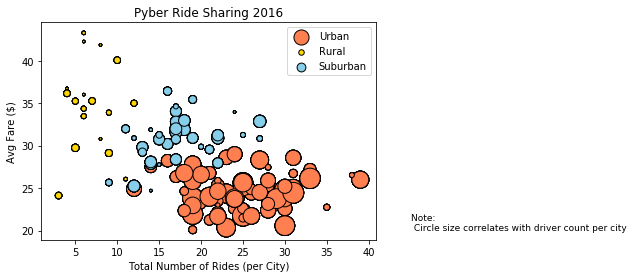

In [191]:
# Build the scatter plots for each city types
for env_type in ['Urban', 'Rural', 'Suburban']:
    df_master_filtered_by_type = df_master_type.loc[df_master_type["type"] == env_type]
    color = color_distinct2[env_type]
    x_data = [df_master_filtered_by_type['ride_count'] for value in x_axis]
    y_data = [df_master_filtered_by_type['avg_fare'] for value in y_axis]
    size_data = [6*df_master_filtered_by_type['driver_count']]
    plt.scatter(x_data, y_data, marker="o", facecolors=color, label=env_type , edgecolors="black", s=size_data)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing 2016")
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Avg Fare ($)")

# Create a legend
plt.legend()
# Incorporate a text label regarding circle size
textstr = ('Note: \n Circle size correlates with driver count per city')
plt.text(45, 20, textstr, fontsize=9)
# Save Figure
plt.savefig('buble_chart1.png')

# Total Fares by City Type

In [174]:
# Calculate Type Percents

#sum of rides grouped by type
combo_df_grouped = combo_df.groupby(['type'])['fare'].sum()       

#total sum of rides 
Fare_sum = combo_df['fare'].sum()

#percent
combo_df_grouped_frame= pd.DataFrame(combo_df_grouped)
combo_df_grouped_frame_rename = combo_df_grouped_frame.rename(columns={'fare':'Sum of Fares'})
combo_df_grouped_frame_rename['Percent'] = combo_df_grouped_frame_rename['Sum of Fares']/Fare_sum*100
combo_df_grouped_frame_rename



Sum of Fares    Percent
type                             
Rural          4327.93   6.811493
Suburban      19356.33  30.463872
Urban         39854.38  62.724635

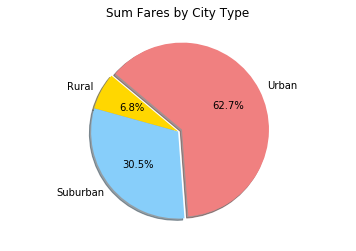

<Figure size 432x288 with 0 Axes>

In [175]:
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
sizes = combo_df_grouped_frame_rename['Percent']
explode = (0,0,0.05)

plt.axis("equal")

plt.pie(sizes, labels=labels, explode=explode,  colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)


plt.title("Sum Fares by City Type")
### title not adding

plt.show()
# Save Figure
plt.savefig('buble_chart2.png')

# Total Rides by City Type

In [176]:
# Calculate Ride Percents

#count of rides grouped by type
combo_df_grouped2 = combo_df.groupby(['type'])['fare'].count()       

#total number of rides 
Fare_count2 = combo_df['fare'].count()

#percent
combo_df_grouped_frame2= pd.DataFrame(combo_df_grouped2)
combo_df_grouped_frame_rename2 = combo_df_grouped_frame2.rename(columns={'fare':'Count of Fares'})
combo_df_grouped_frame_rename2['Percent'] = combo_df_grouped_frame_rename2['Count of Fares']/Fare_count2*100
combo_df_grouped_frame_rename2


Count of Fares    Percent
type                               
Rural                125   5.263158
Suburban             625  26.315789
Urban               1625  68.421053

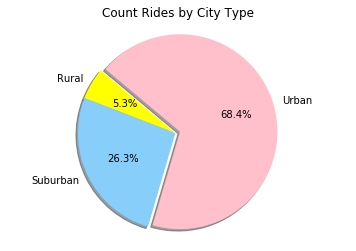

<Figure size 432x288 with 0 Axes>

In [177]:
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["Yellow", "lightskyblue", "Pink"]
sizes = combo_df_grouped_frame_rename2['Percent']
explode = (0,0,0.05)
plt.pie(sizes, labels=labels, explode=explode,  colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Count Rides by City Type")
### title not adding
plt.axis("equal")
plt.show()
# Save Figure
plt.savefig('buble_chart3.png')

# Total Drivers by City Type¶

In [178]:
#sum of rides grouped by type

combo_df_drivergrouped = df_master_type.groupby(['type'])['driver_count'].sum()       
combo_df_drivergrouped.head()

#total sum of drivers 
Driver_sum = df_master_type['driver_count'].sum()
Driver_sum

#percent
combo_df_DriverGrouped= pd.DataFrame(combo_df_drivergrouped)
combo_df_DriverGrouped['Percent'] = combo_df_DriverGrouped['driver_count']/Driver_sum*100
combo_df_DriverGrouped


##careful- origionaly when I did this, sumed drivers of merged list and not master
### would not have know was wrong if answer key wasnt there to compare


driver_count    Percent
type                             
Rural               78   2.623613
Suburban           490  16.481668
Urban             2405  80.894719

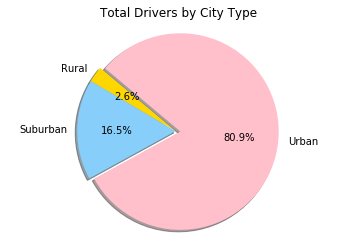

In [179]:
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "Pink"]
sizes = combo_df_DriverGrouped['Percent']
explode = (0,0,0.05)
plt.pie(sizes, labels=labels, explode=explode,  colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Total Drivers by City Type")

### title not adding
plt.axis("equal")
# Save Figure
plt.savefig('buble_chart4.png')